In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

/Users/MP/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# File Names
gameCSV = "game_data.csv"
playerCSV = "player_data.csv"
testCSV = "test_set.csv"
trainingCSV = "training_set.csv"

In [3]:
# Importing CSV Files
gameData = pd.read_csv("game_data.csv")
dfGameData = pd.DataFrame(gameData)

playerData = pd.read_csv("player_data.csv")
dfPlayerData = pd.DataFrame(playerData)

trainingSet = pd.DataFrame(pd.read_csv(trainingCSV))
testSet = pd.DataFrame(pd.read_csv(testCSV))

In [4]:
# Convert DateTime
dfGameData["Game_Date"] = pd.to_datetime(dfGameData["Game_Date"], infer_datetime_format=True)
dfPlayerData["Game_Date"] = pd.to_datetime(dfPlayerData["Game_Date"], infer_datetime_format=True)
trainingSet["Game_Date"] = pd.to_datetime(trainingSet["Game_Date"], infer_datetime_format=True)

# Remove Spaces from column names
trainingSet.rename(columns={"Rounded Viewers":"Viewers"}, inplace=True)

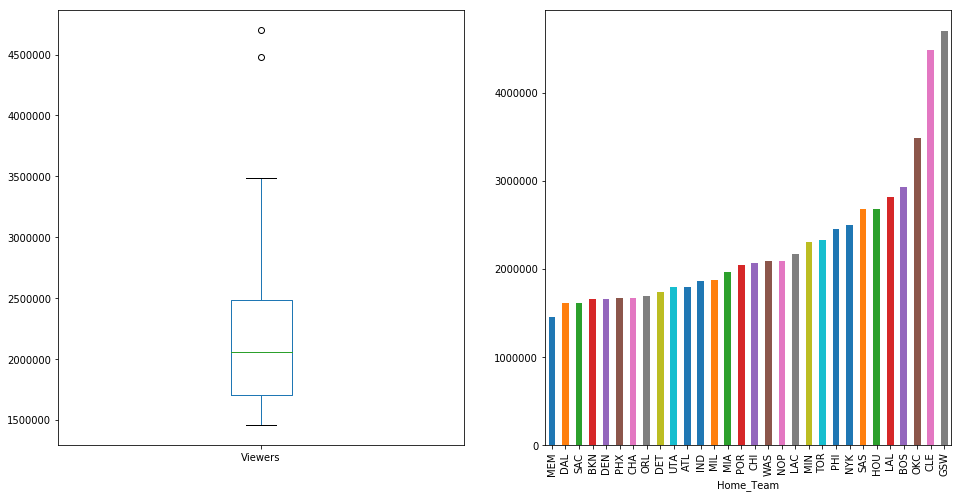

In [41]:
home_viewers = trainingSet.groupby(by="Home_Team").sum()["Viewers"]
away_viewers = trainingSet.groupby(by="Away_Team").sum()["Viewers"]
total_viewers = home_viewers + away_viewers
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
total_viewers.sort_values().plot(kind='box', ax=ax1)
total_viewers.sort_values().plot(kind='bar', ax=ax2)